In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))


Uploaded file with ID 1TUQwMslaaR4aQIeZ3442H1HLt3sPadW8


In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title countries_fact.csv, id 1v-943Cy8Re4s9o04HwWeCRGeOIaTCeMx


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1v-943Cy8Re4s9o04HwWeCRGeOIaTCeMx' #https://drive.google.com/open?id=1v-943Cy8Re4s9o04HwWeCRGeOIaTCeMx
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))


Downloaded content "Country;Area(sq km);Birth rate(births/1000 population);Current account balance;Death rate(deaths/1000 population);Debt - external;Electricity - consumption(kWh);Electricity - production(kWh);Exports;GDP;GDP - per capita;GDP - real growth rate(%);HIV/AIDS - adult prevalence rate(%);HIV/AIDS - deaths;HIV/AIDS - people living with HIV/AIDS;Highways(km);Imports;Industrial production growth rate(%);Infant mortality rate(deaths/1000 live births);Inflation rate (consumer prices)(%);Internet hosts;Internet users;Investment (gross fixed)(% of GDP);Labor force;Life expectancy at birth(years);Military expenditures - dollar figure;Military expenditures - percent of GDP(%);Natural gas - consumption(cu m);Natural gas - exports(cu m);Natural gas - imports(cu m);Natural gas - production(cu m);Natural gas - proved reserves(cu m);Oil - consumption(bbl/day);Oil - exports(bbl/day);Oil - imports(bbl/day);Oil - production(bbl/day);Oil - proved reserves(bbl);Population;Public debt(% of GD

In [0]:
downloaded.GetContentFile('countries_fact_local.csv')

In [0]:
!ls


adc.json  countries_fact_local.csv  sample_data


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('countries_fact_local.csv')

In [0]:
df.head()

,Country;Area(sq km);Birth rate(births/1000 population);Current account balance;Death rate(deaths/1000 population);Debt - external;Electricity - consumption(kWh);Electricity - production(kWh);Exports;GDP;GDP - per capita;GDP - real growth rate(%);HIV/AIDS - adult prevalence rate(%);HIV/AIDS - deaths;HIV/AIDS - people living with HIV/AIDS;Highways(km);Imports;Industrial production growth rate(%);Infant mortality rate(deaths/1000 live births);Inflation rate (consumer prices)(%);Internet hosts;Internet users;Investment (gross fixed)(% of GDP);Labor force;Life expectancy at birth(years);Military expenditures - dollar figure;Military expenditures - percent of GDP(%);Natural gas - consumption(cu m);Natural gas - exports(cu m);Natural gas - imports(cu m);Natural gas - production(cu m);Natural gas - proved reserves(cu m);Oil - consumption(bbl/day);Oil - exports(bbl/day);Oil - imports(bbl/day);Oil - production(bbl/day);Oil - proved reserves(bbl);Population;Public debt(% of GDP);Railways(km);Reserves of foreign exchange & gold;Telephones - main lines in use;Telephones - mobile cellular;Total fertility rate(children born/woman);Unemployment rate(%)
0,String;double;double;double;double;double;doub...
1,Afghanistan;647500;47.02;;20.75;8000000000;652...
2,Akrotiri;123;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
3,Albania;28748;15.08;-504000000;5.12;1410000000...
4,Algeria;2381740;17.13;11900000000;4.60;2190000...


In [0]:
df.tail()

,Country;Area(sq km);Birth rate(births/1000 population);Current account balance;Death rate(deaths/1000 population);Debt - external;Electricity - consumption(kWh);Electricity - production(kWh);Exports;GDP;GDP - per capita;GDP - real growth rate(%);HIV/AIDS - adult prevalence rate(%);HIV/AIDS - deaths;HIV/AIDS - people living with HIV/AIDS;Highways(km);Imports;Industrial production growth rate(%);Infant mortality rate(deaths/1000 live births);Inflation rate (consumer prices)(%);Internet hosts;Internet users;Investment (gross fixed)(% of GDP);Labor force;Life expectancy at birth(years);Military expenditures - dollar figure;Military expenditures - percent of GDP(%);Natural gas - consumption(cu m);Natural gas - exports(cu m);Natural gas - imports(cu m);Natural gas - production(cu m);Natural gas - proved reserves(cu m);Oil - consumption(bbl/day);Oil - exports(bbl/day);Oil - imports(bbl/day);Oil - production(bbl/day);Oil - proved reserves(bbl);Population;Public debt(% of GDP);Railways(km);Reserves of foreign exchange & gold;Telephones - main lines in use;Telephones - mobile cellular;Total fertility rate(children born/woman);Unemployment rate(%)
259,West Bank;5860;32.37;;3.99;108000000;;;2050000...
260,Western Sahara;266000;;;;;83700000;90000000;;;...
261,Yemen;527970;43.07;369900000;8.53;5400000000;2...
262,Zambia;752614;41.38;-181400000;20.23;535300000...
263,Zimbabwe;390580;29.74;-230300000;24.66;4086000...


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
len(df)

264

In [0]:
df.shape

(264, 1)

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1MYW-7LTaDMQ8gltUfYe0KpzFojY9ihPz' #https://drive.google.com/open?id=1MYW-7LTaDMQ8gltUfYe0KpzFojY9ihPz
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0
8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1
11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0
12,1343,0,2.9,0,2,1,34,0.8,171,3,6,235,1671,3911,15,8,8,1,1,1
13,900,1,1.4,1,0,0,30,1,87,2,3,829,1893,439,6,2,20,1,0,0
14,1190,1,2.2,1,5,0,19,0.9

In [0]:
downloaded.GetContentFile('moblie_fact_local.csv')

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('moblie_fact_local.csv')

In [0]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [0]:
df.shape

(1000, 21)

In [0]:
df.loc[5]

id                  6.0
battery_power    1464.0
blue                1.0
clock_speed         2.9
dual_sim            1.0
fc                  5.0
four_g              1.0
int_memory         50.0
m_dep               0.8
mobile_wt         198.0
n_cores             8.0
pc                  9.0
px_height         569.0
px_width          939.0
ram              3506.0
sc_h               10.0
sc_w                7.0
talk_time           3.0
three_g             1.0
touch_screen        1.0
wifi                1.0
Name: 5, dtype: float64

In [0]:
df_thin=df[['battery_power','dual_sim','int_memory','four_g','mobile_wt','ram','three_g']]

In [0]:
df_thin.head()

,battery_power,dual_sim,int_memory,four_g,mobile_wt,ram,three_g
0,1043,1,5,0,193,3476,0
1,841,1,61,1,191,3895,1
2,1807,0,27,0,186,2396,0
3,1546,1,25,1,96,3893,1
4,1434,0,49,1,108,1773,1


In [0]:
df_4g=df_thin[df_thin['four_g']==1]

In [0]:
df_4g.shape

(487, 7)

In [0]:
df_thin['battery_power'].mean()

1248.51

In [0]:
df_thin['battery_power'].describe()

count    1000.000000
mean     1248.510000
std       432.458227
min       500.000000
25%       895.000000
50%      1246.500000
75%      1629.250000
max      1999.000000
Name: battery_power, dtype: float64

In [0]:
df_thin.describe()

,battery_power,dual_sim,int_memory,four_g,mobile_wt,ram,three_g
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1248.510000,0.517000,33.652000,0.487000,139.51100,2138.998000,0.756000
std,432.458227,0.499961,18.128694,0.500081,34.85155,1088.092278,0.429708
min,500.000000,0.000000,2.000000,0.000000,80.00000,263.000000,0.000000
25%,895.000000,0.000000,18.000000,0.000000,109.75000,1237.250000,1.000000
50%,1246.500000,1.000000,34.500000,0.000000,139.00000,2153.500000,1.000000
75%,1629.250000,1.000000,49.000000,1.000000,170.00000,3065.500000,1.000000
max,1999.000000,1.000000,64.000000,1.000000,200.00000,3989.000000,1.000000


In [0]:
df_thin[df_thin['four_g']==1]['ram'].mean()

2173.400410677618

In [0]:
df_thin[df_thin['four_g']==0]['ram'].mean()

2106.33918128655

In [0]:
df_thin[df_thin['four_g']==1]['battery_power'].mean()

1229.64681724846

In [0]:
df_thin[df_thin['four_g']==0]['battery_power'].mean()

1266.4171539961014

In [0]:
g=df_thin.groupby(['four_g'])

In [0]:
for key,df_key in g:
  print(key)
  print(df_key)

0
     battery_power  dual_sim  int_memory  four_g  mobile_wt   ram  three_g
0             1043         1           5       0        193  3476        0
2             1807         0          27       0        186  2396        0
6             1718         0          47       0        156  3873        0
7              833         1          62       0        111  1495        0
9             1520         0          25       0        171   651        1
..             ...       ...         ...     ...        ...   ...      ...
990           1807         0          37       0        162  2741        1
991           1797         0          42       0        174  3359        1
994            936         1          46       0        139   684        1
996            609         1          13       0        186  1933        0
998           1533         1          50       0        171  2509        0

[513 rows x 7 columns]
1
     battery_power  dual_sim  int_memory  four_g  mobile_wt   ram  three

In [0]:
df_thin.groupby(['four_g']).mean()

,battery_power,dual_sim,int_memory,mobile_wt,ram,three_g
four_g,,,,,,
0,1266.417154,0.504873,34.313840,139.528265,2106.339181,0.524366
1,1229.646817,0.529774,32.954825,139.492813,2173.400411,1.000000


In [0]:
df_thin.groupby(['four_g']).max()

,battery_power,dual_sim,int_memory,mobile_wt,ram,three_g
four_g,,,,,,
0,1998,1,64,200,3989,1
1,1999,1,64,200,3984,1


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

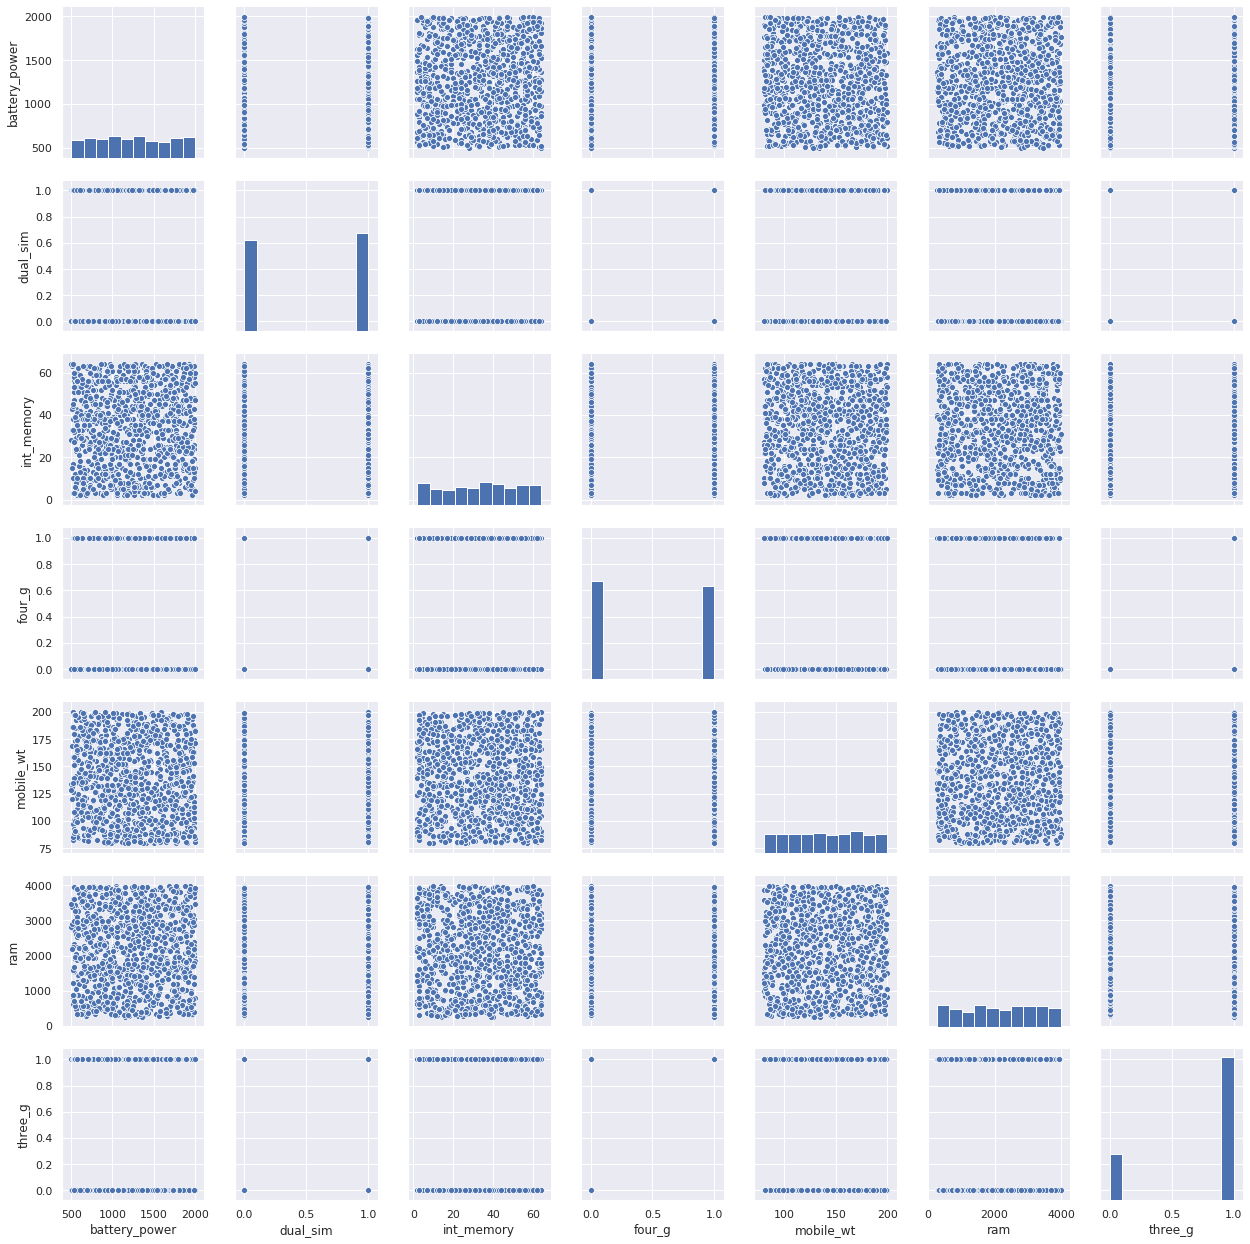

In [0]:
ax=sns.pairplot(df_thin,diag_kind='hist')

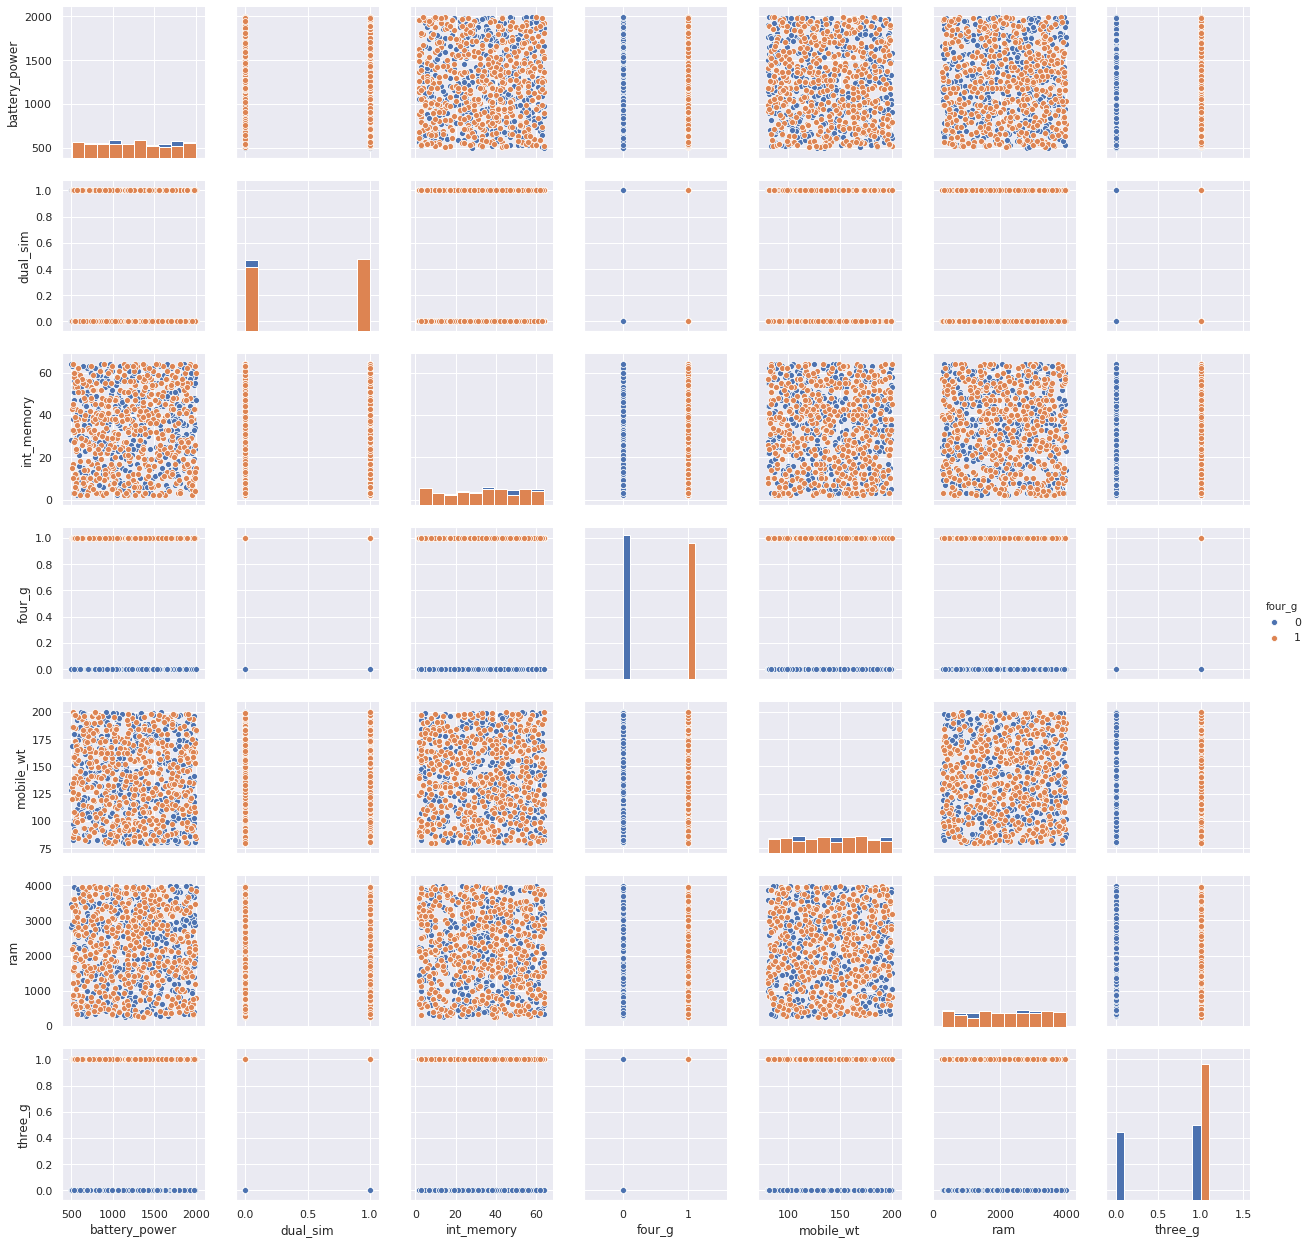

In [0]:
ax=sns.pairplot(df_thin,diag_kind='hist',hue='four_g')

Debugging


In [0]:
def factorial_debugged(x):
  if(not isinstance(x,int)):
    print("This method supports only integers")
    return -1
  if(x==0):
    return 1
  return x*factorial_debugged(x-1)


In [0]:
import random
def code_to_debug():
  import pdb;pdb.set_trace()
  for i in range(10):
    x=random.random()
    factorial_debugged(x)

In [0]:
code_to_debug()

> <ipython-input-2-bd699ca87c3a>(4)code_to_debug()
-> for i in range(10):
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) c
This method supports only integers
This method supports only integers
This method supports only integers
This method supports only integers
This method supports only integers
This method supports only integers
This method supports only integers
This method supports only integers
This method supports onl